<H1>Pandas Overview</H1>
<br/>
Dr. Chris Teplovs<br/>
University of Michigan<br/>
School of Information<br/>
<p>
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
</small>
</p>

This is a short introduction to pandas, geared mainly for new users.

This guide comes directly from the [10 Minute Guide to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) on the Pandas official website. It was ported to a Jupyter notebook by [Binh](https://www.kaggle.com/code/btphan/10-minutes-to-pandas/notebook) to make the code more accessible.  We have edited Binh's work to bring it up to date with the current version of pandas, as well as fixing some minor stylistic issues.

You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)

For this class, we're going to going to go through this notebook quickly.  We'll then spend the next few classes covering the topics introduced in this notebook in more detail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
See the [Data Structure Intro section](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html). Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates,
                  columns=['A', 'B', 'C', 'D'])
# alternatively, columns=list("ABCD")
df

,A,B,C,D
2013-01-01,1.630473,-0.110273,-0.871259,1.013430
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104
2013-01-04,-2.068469,0.047841,0.610566,1.822499
2013-01-05,1.310189,-0.041623,0.758868,1.247042
2013-01-06,-0.212356,0.314896,1.776321,1.252380


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html):

In [6]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object


# Viewing Data
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)

See the top & bottom rows of the frame

In [7]:
df.head()

,A,B,C,D
2013-01-01,1.630473,-0.110273,-0.871259,1.013430
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104
2013-01-04,-2.068469,0.047841,0.610566,1.822499
2013-01-05,1.310189,-0.041623,0.758868,1.247042


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-2.068469,0.047841,0.610566,1.822499
2013-01-05,1.310189,-0.041623,0.758868,1.247042
2013-01-06,-0.212356,0.314896,1.776321,1.252380


Display the index, columns, and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 1.6304731 , -0.1102731 , -0.87125895,  1.01343031],
       [ 0.63387602, -2.80145803, -1.37577062, -0.03450601],
       [-0.72168817, -1.53526553, -0.51946159, -0.36810442],
       [-2.06846902,  0.04784097,  0.61056562,  1.82249867],
       [ 1.31018894, -0.04162256,  0.75886834,  1.24704188],
       [-0.21235643,  0.31489617,  1.77632117,  1.25238046]])

DataFrame.to_numpy() gives a NumPy representation of the underlying data.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data:

In [12]:
df.to_numpy()

array([[ 1.6304731 , -0.1102731 , -0.87125895,  1.01343031],
       [ 0.63387602, -2.80145803, -1.37577062, -0.03450601],
       [-0.72168817, -1.53526553, -0.51946159, -0.36810442],
       [-2.06846902,  0.04784097,  0.61056562,  1.82249867],
       [ 1.31018894, -0.04162256,  0.75886834,  1.24704188],
       [-0.21235643,  0.31489617,  1.77632117,  1.25238046]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive:

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

Describe shows a quick statistic summary of your data

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.095337,-0.687647,0.063211,0.822123
std,1.383242,1.223389,1.183359,0.843028
min,-2.068469,-2.801458,-1.375771,-0.368104
25%,-0.594355,-1.179017,-0.783310,0.227478
50%,0.210760,-0.075948,0.045552,1.130236
75%,1.141111,0.025475,0.721793,1.251046
max,1.630473,0.314896,1.776321,1.822499


Transposing your data

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.630473,0.633876,-0.721688,-2.068469,1.310189,-0.212356
B,-0.110273,-2.801458,-1.535266,0.047841,-0.041623,0.314896
C,-0.871259,-1.375771,-0.519462,0.610566,0.758868,1.776321
D,1.013430,-0.034506,-0.368104,1.822499,1.247042,1.252380


Sorting by an axis (In this case, sorting the columns in reverse alphabetical order):

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.013430,-0.871259,-0.110273,1.630473
2013-01-02,-0.034506,-1.375771,-2.801458,0.633876
2013-01-03,-0.368104,-0.519462,-1.535266,-0.721688
2013-01-04,1.822499,0.610566,0.047841,-2.068469
2013-01-05,1.247042,0.758868,-0.041623,1.310189
2013-01-06,1.252380,1.776321,0.314896,-0.212356


Sorting by values

In [17]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104
2013-01-01,1.630473,-0.110273,-0.871259,1.013430
2013-01-05,1.310189,-0.041623,0.758868,1.247042
2013-01-04,-2.068469,0.047841,0.610566,1.822499
2013-01-06,-0.212356,0.314896,1.776321,1.252380


# Selection

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

## Getting

Selecting a single column, which yields a Series, equivalent to df.one

In [18]:
df['A']

2013-01-01    1.630473
2013-01-02    0.633876
2013-01-03   -0.721688
2013-01-04   -2.068469
2013-01-05    1.310189
2013-01-06   -0.212356
Freq: D, Name: A, dtype: float64

In [19]:
df.A

2013-01-01    1.630473
2013-01-02    0.633876
2013-01-03   -0.721688
2013-01-04   -2.068469
2013-01-05    1.310189
2013-01-06   -0.212356
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,1.630473,-0.110273,-0.871259,1.013430
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104
2013-01-04,-2.068469,0.047841,0.610566,1.822499


## Selecting by Label

See more in[ Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [22]:
df.loc[dates[0]]

A    1.630473
B   -0.110273
C   -0.871259
D    1.013430
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [23]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.630473,-0.110273
2013-01-02,0.633876,-2.801458
2013-01-03,-0.721688,-1.535266
2013-01-04,-2.068469,0.047841
2013-01-05,1.310189,-0.041623
2013-01-06,-0.212356,0.314896


Showing label slicing, both endpoints are included

In [24]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.633876,-2.801458
2013-01-03,-0.721688,-1.535266
2013-01-04,-2.068469,0.047841


Reduction in the dimensions of the returned object

In [25]:
df.loc['20130102', ['A', 'B']] # type: ignore

A    0.633876
B   -2.801458
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [26]:
df.loc[dates[0], 'A'] # type: ignore

1.6304731025243149

For getting fast access to a scalar (equiv to the prior method)

In [27]:
df.at[dates[0], 'A']

1.6304731025243149

## Selection by Position

In [28]:
df.iloc[3]

A   -2.068469
B    0.047841
C    0.610566
D    1.822499
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [29]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-2.068469,0.047841
2013-01-05,1.310189,-0.041623


By lists of integer position locations, similar to the numpy/python style

In [30]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.633876,-1.375771
2013-01-03,-0.721688,-0.519462
2013-01-05,1.310189,0.758868


For slicing rows explicitly

In [31]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104


For slicing columns explicitly

In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.110273,-0.871259
2013-01-02,-2.801458,-1.375771
2013-01-03,-1.535266,-0.519462
2013-01-04,0.047841,0.610566
2013-01-05,-0.041623,0.758868
2013-01-06,0.314896,1.776321


For getting a value explicitly

In [33]:
df.iloc[1, 1]

-2.801458030425783

For getting fast access to a scalar (equiv to the prior method)

In [34]:
df.iat[1, 1]

-2.801458030425783

## Boolean Indexing
Using a single column’s values to select data.

In [35]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.630473,-0.110273,-0.871259,1.013430
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506
2013-01-05,1.310189,-0.041623,0.758868,1.247042


Selecting values from a DataFrame where a boolean condition is met.

In [36]:
df[df > 0]

,A,B,C,D
2013-01-01,1.630473,NaN,NaN,1.013430
2013-01-02,0.633876,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,0.047841,0.610566,1.822499
2013-01-05,1.310189,NaN,0.758868,1.247042
2013-01-06,NaN,0.314896,1.776321,1.252380


Using the isin method for filtering:

In [37]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,1.630473,-0.110273,-0.871259,1.013430,one
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506,one
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104,two
2013-01-04,-2.068469,0.047841,0.610566,1.822499,three
2013-01-05,1.310189,-0.041623,0.758868,1.247042,four
2013-01-06,-0.212356,0.314896,1.776321,1.252380,three


In [38]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104,two
2013-01-05,1.310189,-0.041623,0.758868,1.247042,four


## Setting
Setting a new column automatically aligns the data by the indexes

In [39]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [40]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,1.630473,-0.110273,-0.871259,1.013430,NaN
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506,1.0
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104,2.0
2013-01-04,-2.068469,0.047841,0.610566,1.822499,3.0
2013-01-05,1.310189,-0.041623,0.758868,1.247042,4.0
2013-01-06,-0.212356,0.314896,1.776321,1.252380,5.0


Setting values by label:

In [41]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.110273,-0.871259,1.013430,NaN
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506,1.0
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104,2.0
2013-01-04,-2.068469,0.047841,0.610566,1.822499,3.0
2013-01-05,1.310189,-0.041623,0.758868,1.247042,4.0
2013-01-06,-0.212356,0.314896,1.776321,1.252380,5.0


Setting values by position:

In [42]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.871259,1.013430,NaN
2013-01-02,0.633876,-2.801458,-1.375771,-0.034506,1.0
2013-01-03,-0.721688,-1.535266,-0.519462,-0.368104,2.0
2013-01-04,-2.068469,0.047841,0.610566,1.822499,3.0
2013-01-05,1.310189,-0.041623,0.758868,1.247042,4.0
2013-01-06,-0.212356,0.314896,1.776321,1.252380,5.0


In [43]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.871259,5.0,NaN
2013-01-02,0.633876,-2.801458,-1.375771,5.0,1.0
2013-01-03,-0.721688,-1.535266,-0.519462,5.0,2.0
2013-01-04,-2.068469,0.047841,0.610566,5.0,3.0
2013-01-05,1.310189,-0.041623,0.758868,5.0,4.0
2013-01-06,-0.212356,0.314896,1.776321,5.0,5.0


A where operation with setting.

In [44]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.871259,-5.0,NaN
2013-01-02,-0.633876,-2.801458,-1.375771,-5.0,-1.0
2013-01-03,-0.721688,-1.535266,-0.519462,-5.0,-2.0
2013-01-04,-2.068469,-0.047841,-0.610566,-5.0,-3.0
2013-01-05,-1.310189,-0.041623,-0.758868,-5.0,-4.0
2013-01-06,-0.212356,-0.314896,-1.776321,-5.0,-5.0


## Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.871259,5.0,NaN,1.0
2013-01-02,0.633876,-2.801458,-1.375771,5.0,1.0,1.0
2013-01-03,-0.721688,-1.535266,-0.519462,5.0,2.0,NaN
2013-01-04,-2.068469,0.047841,0.610566,5.0,3.0,NaN


To drop any rows that have missing data:

In [46]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.633876,-2.801458,-1.375771,5.0,1.0,1.0


Filling missing data:

In [47]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.871259,5.0,5.0,1.0
2013-01-02,0.633876,-2.801458,-1.375771,5.0,1.0,1.0
2013-01-03,-0.721688,-1.535266,-0.519462,5.0,2.0,5.0
2013-01-04,-2.068469,0.047841,0.610566,5.0,3.0,5.0


To get the boolean mask where values are nan:

In [48]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats
Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [49]:
df.mean()

A   -0.176408
B   -0.669268
C    0.063211
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [50]:
df.mean(axis='columns')

2013-01-01    1.032185
2013-01-02    0.491329
2013-01-03    0.844717
2013-01-04    1.317988
2013-01-05    2.205487
2013-01-06    2.375772
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension. The following code also shifts the data vertically, leaving NaN values in the unoccupied spaces

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [52]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.721688,-2.535266,-1.519462,4.0,1.0
2013-01-04,-5.068469,-2.952159,-2.389434,2.0,0.0
2013-01-05,-3.689811,-5.041623,-4.241132,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data

In [53]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.871259,5.0,NaN
2013-01-02,0.633876,-2.801458,-2.247030,10.0,1.0
2013-01-03,-0.087812,-4.336724,-2.766491,15.0,3.0
2013-01-04,-2.156281,-4.288883,-2.155926,20.0,6.0
2013-01-05,-0.846092,-4.330505,-1.397057,25.0,10.0
2013-01-06,-1.058449,-4.015609,0.379264,30.0,15.0


### Histogramming 
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    5
2    5
3    3
4    5
5    3
6    0
7    4
8    1
9    3
dtype: int32

In [55]:
s.value_counts()

5    3
3    3
6    1
0    1
4    1
1    1
Name: count, dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [57]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
### Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

Concatenating pandas objects together with [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html):

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.055206,-1.453672,-1.886869,-1.134484
1,-0.748246,-1.917141,1.078256,1.212477
2,1.024962,-0.086987,0.182717,-0.152230
3,0.022336,-0.133294,0.120219,1.884824
4,-2.223187,-1.419804,-0.726410,0.244091
5,0.191503,-0.317517,-0.145353,-0.348169
6,-0.731186,2.075743,1.193426,-1.478489
7,-0.054517,1.459095,-0.419178,-0.769509
8,1.175570,-0.210276,0.318629,-0.130673
9,-0.748983,-0.860968,0.673266,0.841330


In [59]:
#break it into pieces:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.055206 -1.453672 -1.886869 -1.134484
 1 -0.748246 -1.917141  1.078256  1.212477
 2  1.024962 -0.086987  0.182717 -0.152230,
           0         1         2         3
 3  0.022336 -0.133294  0.120219  1.884824
 4 -2.223187 -1.419804 -0.726410  0.244091
 5  0.191503 -0.317517 -0.145353 -0.348169
 6 -0.731186  2.075743  1.193426 -1.478489,
           0         1         2         3
 7 -0.054517  1.459095 -0.419178 -0.769509
 8  1.175570 -0.210276  0.318629 -0.130673
 9 -0.748983 -0.860968  0.673266  0.841330]

In [60]:
pd.concat(pieces)

,0,1,2,3
0,0.055206,-1.453672,-1.886869,-1.134484
1,-0.748246,-1.917141,1.078256,1.212477
2,1.024962,-0.086987,0.182717,-0.152230
3,0.022336,-0.133294,0.120219,1.884824
4,-2.223187,-1.419804,-0.726410,0.244091
5,0.191503,-0.317517,-0.145353,-0.348169
6,-0.731186,2.075743,1.193426,-1.478489
7,-0.054517,1.459095,-0.419178,-0.769509
8,1.175570,-0.210276,0.318629,-0.130673
9,-0.748983,-0.860968,0.673266,0.841330


### Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [65]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [67]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.888606,-2.352253
1,bar,one,0.941337,-0.437533
2,foo,two,0.253071,-0.360168
3,bar,three,-0.337664,-0.011529
4,foo,two,0.345763,0.464845
5,bar,two,0.348371,-1.056012
6,foo,one,0.894394,-0.360016
7,foo,three,1.403687,0.541403


Grouping and then applying a function sum to the resulting groups.

In [68]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,0.952044,-1.505074
foo,onetwotwoonethree,2.008309,-2.066189


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [69]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.941337 -0.437533
    three -0.337664 -0.011529
    two    0.348371 -1.056012
foo one    0.005788 -2.712269
    three  1.403687  0.541403
    two    0.598834  0.104677

# Reshaping
See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).



## Stack

In [70]:
tuples = list(
    zip(
        *[
            ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
            ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
        ]
    )
)
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [71]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [72]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.133258 -0.785923
      two    -0.100792 -0.813385
baz   one     0.373915  0.324433
      two     1.354337  1.328079
foo   one    -0.213473 -0.239559
      two    -0.110560  0.310238
qux   one    -1.015087  1.366569
      two    -0.080720 -1.074634

In [73]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.133258 -0.785923
      two    -0.100792 -0.813385
baz   one     0.373915  0.324433
      two     1.354337  1.328079

The [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [74]:
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.133258
               B   -0.785923
       two     A   -0.100792
               B   -0.813385
baz    one     A    0.373915
               B    0.324433
       two     A    1.354337
               B    1.328079
foo    one     A   -0.213473
               B   -0.239559
       two     A   -0.110560
               B    0.310238
qux    one     A   -1.015087
               B    1.366569
       two     A   -0.080720
               B   -1.074634
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [75]:
stacked.unstack()

A         B
first second                    
bar   one    -0.133258 -0.785923
      two    -0.100792 -0.813385
baz   one     0.373915  0.324433
      two     1.354337  1.328079
foo   one    -0.213473 -0.239559
      two    -0.110560  0.310238
qux   one    -1.015087  1.366569
      two    -0.080720 -1.074634

In [76]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.133258 -0.100792
      B -0.785923 -0.813385
baz   A  0.373915  1.354337
      B  0.324433  1.328079
foo   A -0.213473 -0.110560
      B -0.239559  0.310238
qux   A -1.015087 -0.080720
      B  1.366569 -1.074634

In [77]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.133258  0.373915 -0.213473 -1.015087
       B -0.785923  0.324433 -0.239559  1.366569
two    A -0.100792  1.354337 -0.110560 -0.080720
       B -0.813385  1.328079  0.310238 -1.074634

### Pivot Tables
See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

In [78]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.581087,1.189625
1,one,B,foo,0.012334,0.844630
2,two,C,foo,0.785660,1.004133
3,three,A,bar,-1.526898,0.280848
4,one,B,bar,0.276479,1.178527
5,one,C,bar,0.600700,0.768724
6,two,A,foo,-0.673573,-0.095055
7,three,B,foo,0.499515,-0.848073
8,one,C,foo,0.760813,-0.226635
9,one,A,bar,-0.451715,1.331622


We can produce pivot tables from this data very easily:

In [79]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.451715 -1.581087
      B  0.276479  0.012334
      C  0.600700  0.760813
three A -1.526898       NaN
      B       NaN  0.499515
      C  0.523853       NaN
two   A       NaN -0.673573
      B  1.003970       NaN
      C       NaN  0.785660

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

In [80]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    25528
Freq: 5T, dtype: int32

Time zone representation

In [81]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.186502
2012-03-07    0.356402
2012-03-08    0.035450
2012-03-09    0.731573
2012-03-10   -0.106454
Freq: D, dtype: float64

In [82]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.186502
2012-03-07 00:00:00+00:00    0.356402
2012-03-08 00:00:00+00:00    0.035450
2012-03-09 00:00:00+00:00    0.731573
2012-03-10 00:00:00+00:00   -0.106454
Freq: D, dtype: float64

Convert to another time zone

In [83]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.186502
2012-03-06 19:00:00-05:00    0.356402
2012-03-07 19:00:00-05:00    0.035450
2012-03-08 19:00:00-05:00    0.731573
2012-03-09 19:00:00-05:00   -0.106454
Freq: D, dtype: float64

Converting between time span representations

In [84]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.375493
2012-02-29    0.972198
2012-03-31   -0.758428
2012-04-30    1.473514
2012-05-31    0.447530
Freq: M, dtype: float64

In [85]:
ps = ts.to_period('M')
ps

2012-01    1.375493
2012-02    0.972198
2012-03   -0.758428
2012-04    1.473514
2012-05    0.447530
Freq: M, dtype: float64

In [86]:
ps.to_timestamp()

2012-01-01    1.375493
2012-02-01    0.972198
2012-03-01   -0.758428
2012-04-01    1.473514
2012-05-01    0.447530
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [87]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'E') + 1).asfreq('H', 'S') + 9
ts.head()

1990-03-01 09:00   -2.306320
1990-06-01 09:00   -1.385665
1990-09-01 09:00   -0.885961
1990-12-01 09:00    1.497218
1991-03-01 09:00   -0.515273
Freq: H, dtype: float64

# Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

In [88]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Convert the raw grades to a categorical data type:

In [89]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [90]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [91]:
# NOTE: updated from original recording
df["grade"] = df["grade"].cat.rename_categories(["very good", "good", "very bad"])

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [92]:
df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Sorting is per order in the categories, not lexical order.

In [93]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column shows also empty categories.

In [94]:
df.groupby("grade").size()

C:\Users\Matt\AppData\Local\Temp\ipykernel_11348\3951628473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very good    3
good         2
very bad     1
dtype: int64

# Plotting
[Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) docs

<Axes: >

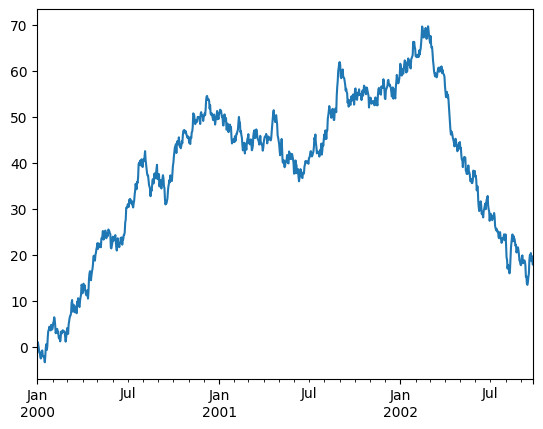

In [95]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

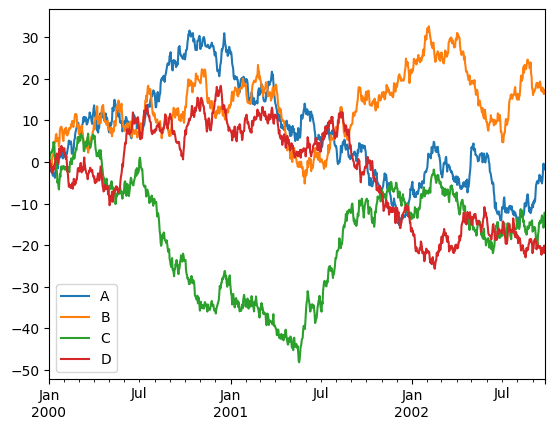

In [96]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

# Getting Data In/Out
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [97]:
df.to_csv('foo.csv')

In [98]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.606753,0.506443,0.070234,-0.671014
1,2000-01-02,-1.131012,-1.255007,0.180331,0.366384
2,2000-01-03,-1.470045,-0.988652,1.667275,-0.548519
3,2000-01-04,-2.048320,-0.606532,2.009632,-0.919596
4,2000-01-05,-2.298882,0.424774,2.319252,-0.524412
...,...,...,...,...,...
995,2002-09-22,-2.087422,16.801802,-13.910623,-21.890210
996,2002-09-23,-0.423807,16.560703,-15.811012,-21.131569
997,2002-09-24,-1.860224,16.267927,-15.085763,-20.138108
998,2002-09-25,-1.734426,17.340152,-12.212632,-20.097686


# Gotchas
If you are trying an operation and you see an exception like:

In [99]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas-truth) for an explanation and what to do.
